In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from collections import Counter
%matplotlib inline
X_train = pd.read_csv('../RSEP/data/trx_data.csv')

In [4]:
X_train.head()

,customerId,products
0,0,20
1,1,2|2|23|68|68|111|29|86|107|152
2,2,111|107|29|11|11|11|33|23
3,3,164|227
4,5,2|2


**The Above is the list of item bought by a customer , where customers are defined by a different customer ID

In [5]:
X_train.shape

(62483, 2)

In [6]:
X_train['products'] = X_train['products'].apply(lambda x: [int(i) for i in x.split('|')])
X_train.head().set_index('customerId')['products'].apply(pd.Series).reset_index()

,customerId,0,1,2,3,4,5,6,7,8,9
0,0,20.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2.0,2.0,23.0,68.0,68.0,111.0,29.0,86.0,107.0,152.0
2,2,111.0,107.0,29.0,11.0,11.0,11.0,33.0,23.0,NaN,NaN
3,3,164.0,227.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,2.0,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**The above table is the products bought and represneted in a matrix form with customer Id as columns

**The below cell makes a new dataframe that has customerId with number of products bought 

In [7]:
X_train_plot = X_train.copy()
X_train_plot['products'] = X_train_plot['products'].apply(lambda x: len(x))

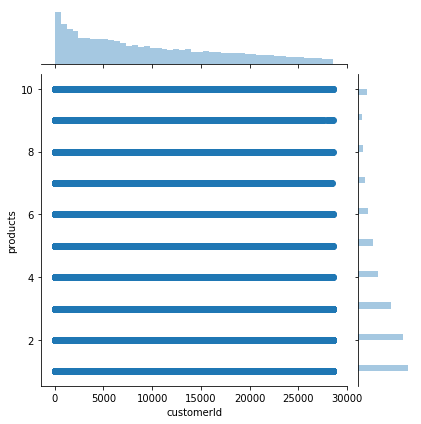

In [8]:
sns.jointplot(x="customerId", y="products", data=X_train_plot)

**The given plot shows a joint plot to have a view of no. of products bought by a particular customer

**The following helper function finds the total products along with the no. of times they are bought this shows the popularity of a particular product

In [9]:
tot_products=[]
for x in X_train['products']:
    for i in x:
        tot_products.append(i)


cnt= Counter()
for word in tot_products:
    cnt[word] += 1

product_x = list(dict(cnt).keys())
proct_y = list(dict(cnt).values())

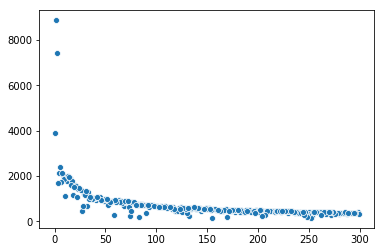

In [10]:
sns.scatterplot(x=product_x, y=proct_y)

**The above plot shows how many times a particulat product is bought.. The plot shows that products with less product ID are popular products

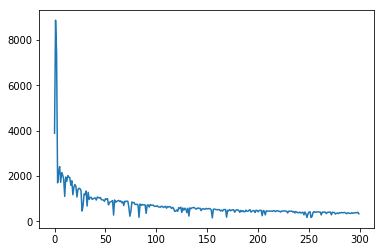

In [11]:
sns.lineplot(x=product_x, y= proct_y)

**Similar line plot that also depicts a similar relation

In [12]:
data = pd.melt(X_train.set_index('customerId')['products'].apply(pd.Series).reset_index(), 
             id_vars=['customerId'],
             value_name='products') \
    .dropna().drop(['variable'], axis=1) \
    .groupby(['customerId', 'products']) \
    .agg({'products': 'count'}) \
    .rename(columns={'products': 'purchase_count'}) \
    .reset_index() \
    .rename(columns={'products': 'productId'})
data['productId'] = data['productId'].astype(np.int64)

**We now convert the given matrix into a table of rows having columns as customerID priduct Id and purchase count

In [98]:
print(data.shape)
data.head()

(133585, 3)


,customerId,productId,purchase_count
0,0,1,2
1,0,13,1
2,0,19,3
3,0,20,1
4,0,31,2


**The given table has 133585 entries

In [103]:
df_matrix = pd.pivot_table(data, values='purchase_count', index='customerId', columns='productId',fill_value=0)
df_matrix.head()

productId,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
customerId,,,,,,,,,,,,,,,,,,,,,
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,6,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Now the matrix is converted into a pivot columns having values as purchase count of a particular customer of a particular product. The matrix is of shape (5 X 300)

In [104]:
df_matrix.reset_index(inplace=True)
df_matrix = df_matrix.drop('customerId', axis=1)
df_matrix.head()

productId,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,6,0,0,0,0,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Now we drop the customerId axis to remove the relationship of products with customer id and establish a relationship between productId and Products count in a particular row

In [139]:
X = pd.DataFrame(index=df_matrix.columns,columns=df_matrix.columns)
X.head()

productId,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
productId,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**We make a new dataframe to establish relationship between different products with other other products by making a correlation matrix

In [108]:
from scipy.spatial.distance import cosine

for i in range(0,len(X.columns)) :
    for j in range(0,len(X.columns)) :
        X.ix[i,j] = 1-cosine(df_matrix.ix[:,i],df_matrix.ix[:,j])
        
X.head()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """


productId,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
productId,,,,,,,,,,,,,,,,,,,,,
0,1,0.232853,0.138555,0.0571834,0.084871,0.0873253,0.0339367,0.0784759,0.0673018,0.0614674,...,0.0122547,0.0239547,0.0330519,0.0190157,0.0285197,0.0432168,0.0369729,0.0327717,0.048188,0.039067
1,0.232853,1,0.257813,0.0941427,0.123347,0.183011,0.065294,0.133357,0.102814,0.115525,...,0.0573352,0.0381217,0.0644098,0.0394544,0.0347248,0.0910749,0.0624189,0.0686417,0.070415,0.0599644
2,0.138555,0.257813,1,0.173237,0.107032,0.199987,0.0693722,0.110326,0.147925,0.0984115,...,0.055962,0.0454754,0.0942845,0.0393877,0.038813,0.0812477,0.0581636,0.058078,0.0923647,0.0337704
3,0.0571834,0.0941427,0.173237,1,0.0532665,0.0723889,0.0272919,0.0508938,0.0702261,0.0364706,...,0.00981402,0.0155276,0.0308246,0.0162409,0.0136347,0.0434475,0.021637,0.0310042,0.0361983,0.0151408
4,0.084871,0.123347,0.107032,0.0532665,1,0.0847293,0.0306737,0.0991186,0.0564109,0.0328524,...,0.0323798,0.0310787,0.0500971,0.0251383,0.0375357,0.030701,0.0225015,0.0305018,0.0283521,0.0691724


**The Above is the cosine simmilarity values between product i,j where i,j is the indices of matrix given above. The higher the cosine simmilarity function higher is the similarity between two products and is recommended to the user

In [113]:
similar_products = pd.DataFrame(index=X.columns,columns=range(1,7))
for i in range(0,len(X.columns)): 
    similar_products.ix[i] = X.ix[i].sort_values(ascending=False)[:6].index
    
print(similar_products)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


             1    2    3    4    5    6
productId                              
0            0    1   72    2   13   12
1            1   31    2    0    5   21
2            2   14    1  162   17    5
3            3    2    1  134  187   85
4            4    1    2    7   13   52
5            5   33   17    2   76    1
6            6   87  294   74    9  128
7            7    1   43   65    2   77
8            8   48   38   79   36  194
9            9   50   63    1   45  282
10          10   32   90   75   27   72
11          11   23   29  107  114    2
12          12   66    2    0   15    1
13          13   72   43    1    2    0
14          14    2  162   17  105   21
15          15   66    2   16   12    7
16          16   81   55  159  135    2
17          17    2  162    5   14  111
18          18  259  272    1    0    2
19          19    2    1    5  106  223
20          20  135  287    2  172    1
21          21   47    2    1  195   61
22          22  121    4    1    7   30


**The above table shows the first six most correlated products based on the increasing order of simmilarity of cosine simmilarity

In [124]:
X_train.head()

,customerId,products
0,0,[20]
1,1,"[2, 2, 23, 68, 68, 111, 29, 86, 107, 152]"
2,2,"[111, 107, 29, 11, 11, 11, 33, 23]"
3,3,"[164, 227]"
4,5,"[2, 2]"


**The products bought by a particular customer

In [135]:
def get_recommendations(customer_ID, no_of_recommendations):
    buy_products = list(X_train.loc[customer_ID,:])[1]
    print(buy_products)
    counter= 0
    flag=0
    recommended =[]
    for i in buy_products:
        if(flag==-1):
            break
        similar = list(similar_products.loc[i,:])
        print(similar)
        for j in similar:
            if(j not in buy_products and j not in recommended):
                recommended.append(j)
                counter+=1
            if(counter>=no_of_recommendations):
                flag=-1
                break
    return recommended
    

  **The above code is an helper function that takes customer Id and no. of recommendations as input it finds the first six recommended products of a particular product bought by a customer then appends them in an given list sorts them in increasing order of simmilarity and gives the first n entries, where n is the no. of recommendations

In [140]:
get_recommendations(3,5)

[164, 227]
[164, 46, 11, 107, 114, 23]


[46, 11, 107, 114, 23]

**The follwing function gave recommendations as product having productID 46,11,107,114,23 (5 recommendations) for customer having customer ID as 3 who has bought products having productID 164, 227